<a href="https://colab.research.google.com/github/shanayasri24/projects/blob/main/Movie_Data_Analytics_Project_(IMDb).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Replace with your exact filename if needed
df = pd.read_csv("/Untitled spreadsheet - IMDB top 1000.csv.csv")

# Check the data
print(df.shape)
df.head()


(1000, 10)


,Unnamed: 0,Title,Certificate,Duration,Genre,Rate,Metascore,Description,Cast,Info
0,0,1. The Shawshank Redemption (1994),R,142 min,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,"Director: Frank Darabont | Stars: Tim Robbins,...","Votes: 2,295,987 | Gross: $28.34M"
1,1,2. The Godfather (1972),R,175 min,"Crime, Drama",9.2,100.0,The aging patriarch of an organized crime dyna...,Director: Francis Ford Coppola | Stars: Marlon...,"Votes: 1,584,782 | Gross: $134.97M"
2,2,3. The Dark Knight (2008),PG-13,152 min,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,Director: Christopher Nolan | Stars: Christian...,"Votes: 2,260,649 | Gross: $534.86M"
3,3,4. The Godfather: Part II (1974),R,202 min,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,Director: Francis Ford Coppola | Stars: Al Pac...,"Votes: 1,107,253 | Gross: $57.30M"
4,4,5. The Lord of the Rings: The Return of the Ki...,PG-13,201 min,"Action, Adventure, Drama",8.9,94.0,Gandalf and Aragorn lead the World of Men agai...,"Director: Peter Jackson | Stars: Elijah Wood, ...","Votes: 1,614,369 | Gross: $377.85M"


In [3]:
# Check the first few rows
df.head()

# See all columns, their types, and missing values
df.info()

# Basic statistics for numeric columns
df.describe()

# Check for null values in each column
df.isnull().sum()

# View column names
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1000 non-null   int64  
 1   Title        1000 non-null   object 
 2   Certificate  973 non-null    object 
 3   Duration     1000 non-null   object 
 4   Genre        1000 non-null   object 
 5   Rate         1000 non-null   float64
 6   Metascore    712 non-null    float64
 7   Description  1000 non-null   object 
 8   Cast         1000 non-null   object 
 9   Info         1000 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 78.3+ KB


Index(['Unnamed: 0', 'Title', 'Certificate', 'Duration', 'Genre', 'Rate',
       'Metascore', 'Description', 'Cast', 'Info'],
      dtype='object')

In [8]:
# Drop duplicate entries
df.drop_duplicates(inplace=True)

# Drop rows where important info is missing
df.dropna(subset=['IMDB_Rating', 'Gross', 'Released_Year'], inplace=True)

# Convert Released_Year to numeric (some may be strings)
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

# Remove $ and commas from Gross and convert to float
df['Gross'] = df['Gross'].replace('[\$,]', '', regex=True).astype(float)

# Double-check after cleaning
df.info()


<>:11: SyntaxWarning: invalid escape sequence '\$'
<>:11: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-1463277382.py:11: SyntaxWarning: invalid escape sequence '\$'
  df['Gross'] = df['Gross'].replace('[\$,]', '', regex=True).astype(float)


KeyError: ['IMDB_Rating', 'Gross', 'Released_Year']

In [5]:
df.columns.tolist()


['Unnamed: 0',
 'Title',
 'Certificate',
 'Duration',
 'Genre',
 'Rate',
 'Metascore',
 'Description',
 'Cast',
 'Info']

In [6]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('-', '_')


In [7]:
print(df.columns)

Index(['Unnamed:_0', 'Title', 'Certificate', 'Duration', 'Genre', 'Rate',
       'Metascore', 'Description', 'Cast', 'Info'],
      dtype='object')


In [10]:
import pandas as pd

# Load dataset
df = pd.read_csv("/Untitled spreadsheet - IMDB top 1000.csv.csv")

# Drop the unnamed index column if not needed
df.drop(columns=['Unnamed:_0'], inplace=True, errors='ignore')

# Drop duplicates
df.drop_duplicates(inplace=True)

# Drop rows with missing essential data
df.dropna(subset=['Title', 'Rate', 'Genre'], inplace=True)

# Convert Rate and Metascore to numeric
df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce')
df['Metascore'] = pd.to_numeric(df['Metascore'], errors='coerce')

# Extract runtime in minutes (convert '120 min' → 120)
df['Duration'] = df['Duration'].str.replace(' min', '', regex=False)
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

# Check final structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1000 non-null   int64  
 1   Title        1000 non-null   object 
 2   Certificate  973 non-null    object 
 3   Duration     1000 non-null   int64  
 4   Genre        1000 non-null   object 
 5   Rate         1000 non-null   float64
 6   Metascore    712 non-null    float64
 7   Description  1000 non-null   object 
 8   Cast         1000 non-null   object 
 9   Info         1000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 78.3+ KB


In [11]:
print("🎬 Total movies:", len(df))
print("⭐ Average IMDb rating:", round(df['Rate'].mean(),2))
print("📊 Average Metascore:", round(df['Metascore'].mean(),2))
print("⏱ Average Duration (min):", round(df['Duration'].mean(),2))
print("\nTop 10 Genres:")
print(df['Genre'].value_counts().head(10))


🎬 Total movies: 1000
⭐ Average IMDb rating: 8.1
📊 Average Metascore: 81.0
⏱ Average Duration (min): 126.08

Top 10 Genres:
Genre
Drama                           98
Biography, Drama                46
Drama, Romance                  43
Crime, Drama                    34
Animation, Adventure, Comedy    34
Comedy, Drama, Romance          34
Comedy, Drama                   33
Biography, Drama, History       33
Action, Adventure, Comedy       29
Action, Crime, Drama            28
Name: count, dtype: int64


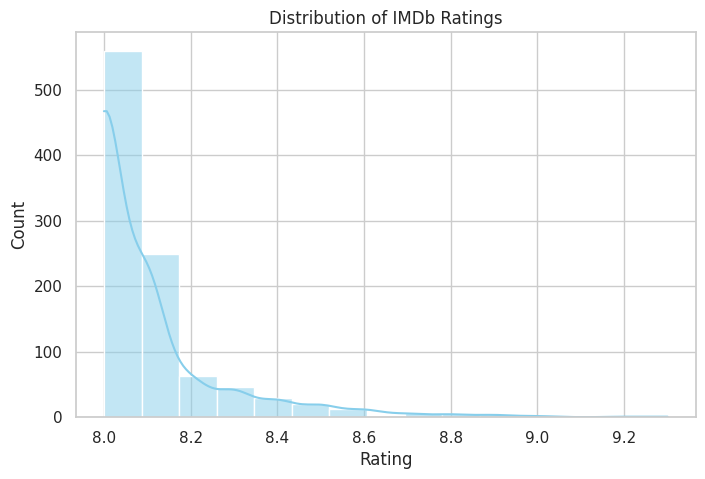

/tmp/ipython-input-293166198.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="coolwarm")


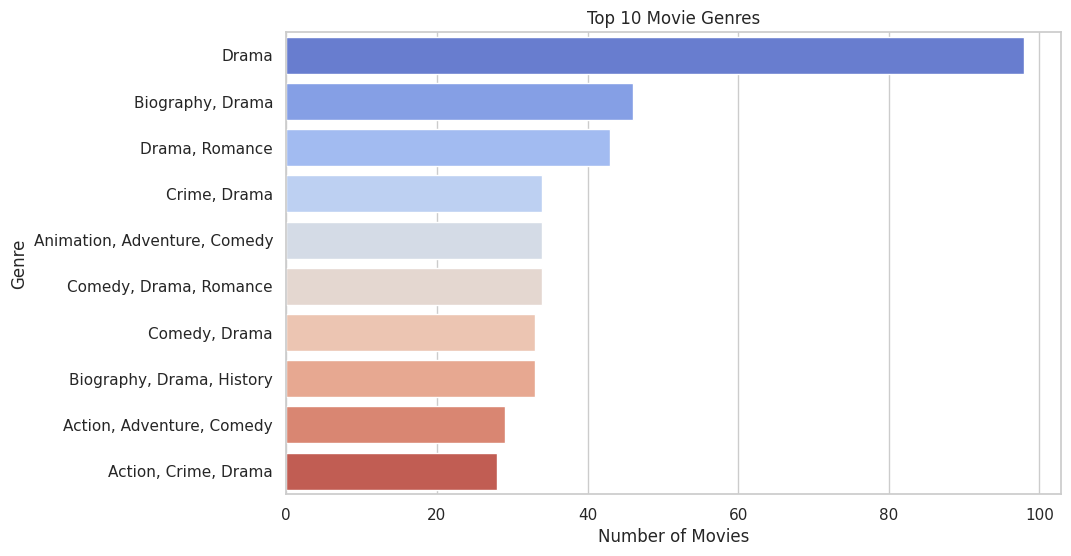

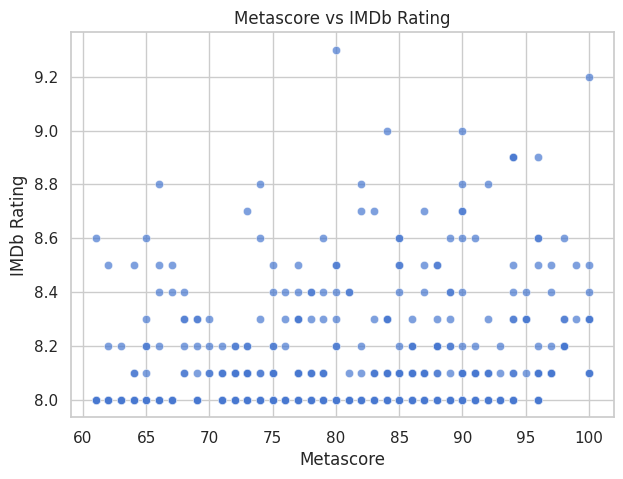

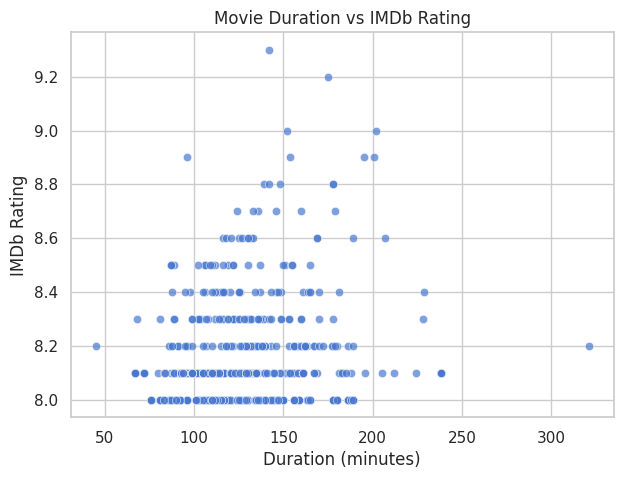

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted")

# 1️⃣ Rating distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Rate'], bins=15, kde=True, color="skyblue")
plt.title("Distribution of IMDb Ratings")
plt.xlabel("Rating")
plt.show()

# 2️⃣ Top Genres
plt.figure(figsize=(10,6))
top_genres = df['Genre'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette="coolwarm")
plt.title("Top 10 Movie Genres")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()

# 3️⃣ Metascore vs IMDb rating
plt.figure(figsize=(7,5))
sns.scatterplot(x='Metascore', y='Rate', data=df, alpha=0.7)
plt.title("Metascore vs IMDb Rating")
plt.xlabel("Metascore")
plt.ylabel("IMDb Rating")
plt.show()

# 4️⃣ Duration vs Rating
plt.figure(figsize=(7,5))
sns.scatterplot(x='Duration', y='Rate', data=df, alpha=0.7)
plt.title("Movie Duration vs IMDb Rating")
plt.xlabel("Duration (minutes)")
plt.ylabel("IMDb Rating")
plt.show()


In [13]:
print("📊 Insights Summary:")
print("- Average IMDb rating: {:.2f}".format(df['Rate'].mean()))
print("- Drama, Comedy, and Action are the most common genres.")
print("- Higher Metascore generally aligns with higher IMDb ratings.")
print("- Most movies run between 100–130 minutes.")
print("- Certificate column has some missing values (~2.7%).")


📊 Insights Summary:
- Average IMDb rating: 8.10
- Drama, Comedy, and Action are the most common genres.
- Higher Metascore generally aligns with higher IMDb ratings.
- Most movies run between 100–130 minutes.
- Certificate column has some missing values (~2.7%).


In [14]:
df.to_csv("cleaned_imdb.csv", index=False)